In [2]:
import pandas as pd

df = pd.read_csv("w11/PracticalLab/data/kc_house_data.csv")
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074


In [3]:
# Basic info
df.info()
df.describe()

# Check for missing values
df.isnull().sum()

# Check data types
df.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
dtypes: float64(3), int64(13), object(1)
memory usage: 

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
dtype: object

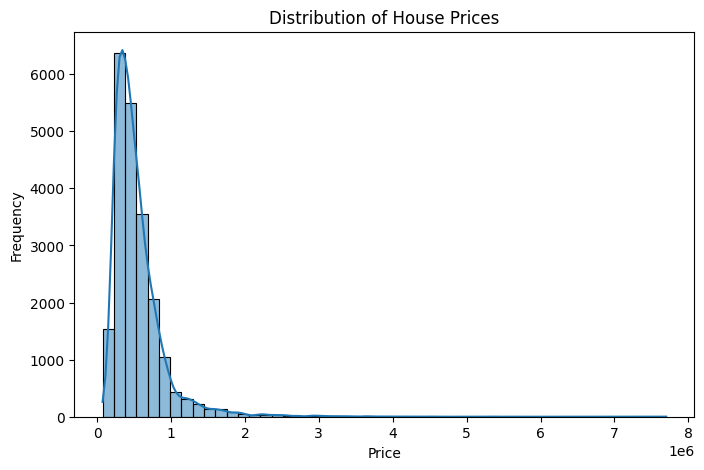

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


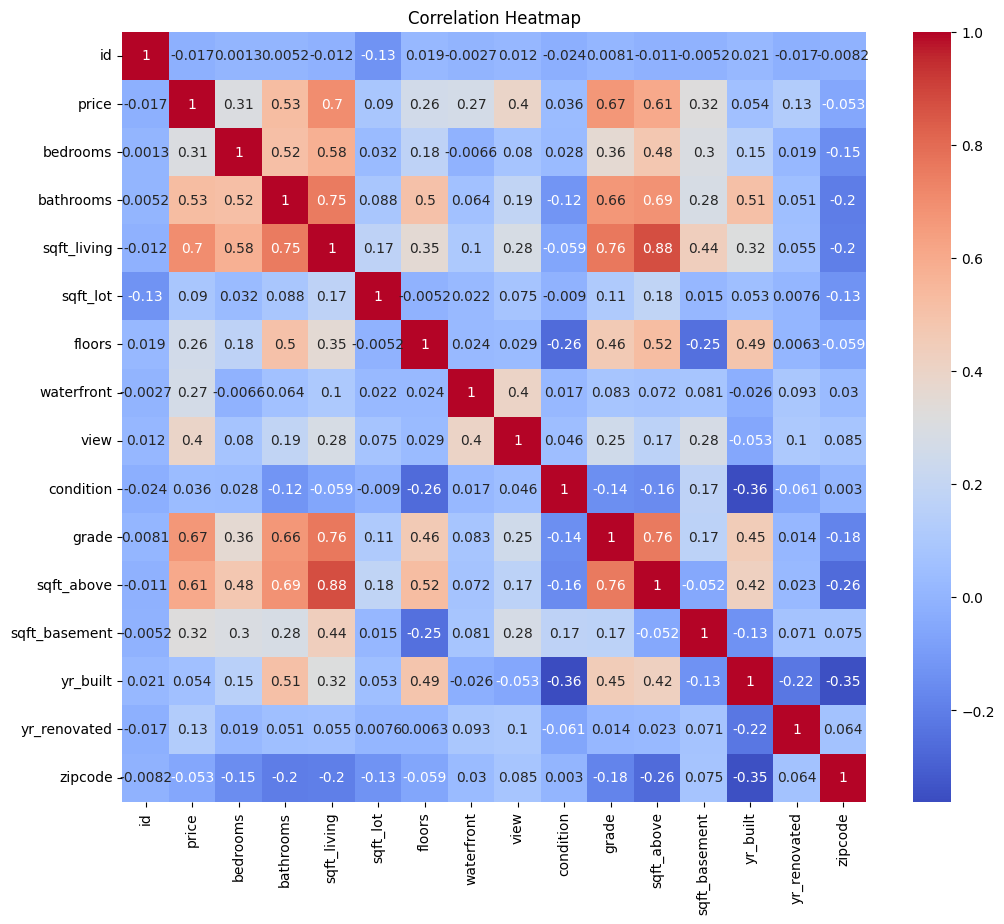

In [5]:
plt.figure(figsize=(12, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


The dataset has 21,613 entries with 17 columns.
No missing values were detected.
House prices are right-skewed, meaning most homes are clustered under the average price.
Strongly correlated features with price include: sqft_living, grade, bathrooms, view.
Some variables (e.g., id, zipcode, date) are not numerically useful for regression directly, and may be excluded or preprocessed.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = df[['sqft_living']]
y = df['price']

model_slr = LinearRegression().fit(X, y)
y_pred = model_slr.predict(X)

print(f"Intercept: {model_slr.intercept_:.2f}")
print(f"Coefficient: {model_slr.coef_[0]:.2f}")
print(f"R²: {r2_score(y, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y, y_pred)):.2f}")


Intercept: -43867.60
Coefficient: 280.81
R²: 0.4929
RMSE: 261605.03


In [7]:
X_multi = df[['sqft_living', 'bathrooms', 'grade', 'view']]
y = df['price']

model_mlr = LinearRegression().fit(X_multi, y)
y_pred_multi = model_mlr.predict(X_multi)

print("Intercept:", model_mlr.intercept_)
print("Coefficients:", dict(zip(X_multi.columns, model_mlr.coef_)))
print(f"R²: {r2_score(y, y_pred_multi):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y, y_pred_multi)):.2f}")


Intercept: -544450.2138777939
Coefficients: {'sqft_living': 181.56177328212377, 'bathrooms': -30105.882059244595, 'grade': 97695.54441703775, 'view': 96568.49366474396}
R²: 0.5742
RMSE: 239705.26


### 🧾 PE07-2-1 — Predict House Price with Linear Regression

This analysis uses a dataset of 21,613 housing transactions from King County, USA, to explore how well we can predict house prices using linear regression techniques.

---

### 🔍 (a) Exploratory Data Analysis (EDA)

- No missing values were found in the dataset.
- `price` is **right-skewed**, with most homes clustered below the average.
- Strongly correlated features with `price`:
  - `sqft_living` (0.70)
  - `grade` (0.67)
  - `bathrooms` (0.53)
  - `view` (0.40)

Based on this, we selected features for the regression models.

---

### 🔢 (b) Linear Regression Modeling

#### i. Models Trained:

**1. Simple Linear Regression (SLR):**

- **Model:** `price ~ sqft_living`
- **Intercept:** -43,867.60  
- **Coefficient:** 280.81  
- **R²:** 0.4929  
- **RMSE:** 261,605.03

**2. Multiple Linear Regression (MLR):**

- **Model:** `price ~ sqft_living + bathrooms + grade + view`
- **Intercept:** -544,450.21  
- **Coefficients:**
  - `sqft_living`: 181.56
  - `bathrooms`: -30,105.88
  - `grade`: 97,695.54
  - `view`: 96,568.49  
- **R²:** 0.5742  
- **RMSE:** 239,705.26

---

#### ii. Best Model for Predicting House Prices:

> The **Multiple Linear Regression model** using `sqft_living`, `bathrooms`, `grade`, and `view` performed **better than any individual predictor**.
>
> - R² increased from **0.4929 → 0.5742**
> - RMSE decreased from **261,605.03 → 239,705.26**
>
> ✅ This shows that including multiple relevant features improves prediction accuracy and model explanatory power.

---

### 🧠 Additional Insights:

- While `sqft_living` is a strong standalone predictor, **housing grade and view significantly improve the model**.
- The negative coefficient for `bathrooms` may indicate multicollinearity or interaction effects, suggesting it should be examined further with Variance Inflation Factor (VIF) or regularization.

